In [28]:
from influxdb_client import InfluxDBClient
import pandas as pd
import dateutil.parser
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [29]:
org = "FHSWF"
bucket = "weather"
token="clmwcDxm_39ML529Q5lbtT4XRLChNqqGull5VJt_zrFkAw4rTTPcMyzkhPo2sAlDhr6mIJW66en1PqRGmybRXQ=="
with InfluxDBClient("http://localhost:8086", token=token, org=org) as dbclient:
    query = 'from(bucket: "weather") |> range(start: -3d, stop:2w) |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")'
    tables = dbclient.query_api().query_data_frame(org=org, query=query)
    

In [30]:
#_time is the forecast time _measurement is when the forecast was generated
# make a multiindexed pandas df for separation of different forecasts

In [45]:
data = pd.concat(tables)
data = data.set_index(['_measurement', data['_time']])
data

result  table  \
_measurement         _time                                       
2022-08-19T06:37:29Z 2022-08-19 07:00:00+00:00  _result      0   
                     2022-08-19 08:00:00+00:00  _result      0   
                     2022-08-19 09:00:00+00:00  _result      0   
                     2022-08-19 10:00:00+00:00  _result      0   
                     2022-08-19 11:00:00+00:00  _result      0   
...                                                 ...    ...   
weather              2022-08-26 18:00:00+00:00  _result      4   
                     2022-08-27 00:00:00+00:00  _result      4   
                     2022-08-27 06:00:00+00:00  _result      4   
                     2022-08-27 12:00:00+00:00  _result      4   
                     2022-08-27 18:00:00+00:00  _result      4   

                                                                         _start  \
_measurement         _time                                                        
2022-08-19T06:37:29Z 2022-08-19 07:00:00+00:00 2022-08-16 10:05:03.682774+00:00   
                     2022-08-19 08:00:00+00:00 2022-08-16 10:05:03.682774+00:00   
                     2022-08-19 09:00:00+00:00 2022-08-16 10:05:03.682774+00:00   
                     2022-08-19 10:00:00+00:00 2022-08-16 10:05:03.682774+00:00   
                     2022-08-19 11:00:00+00:00 2022-08-16 10:05:03.682774+00:00   
...                                                                         ...   
weather              2022-08-26 18:00:00+00:00 2022-08-16 10:05:03.682774+00:00   
                     2022-08-27 00:00:00+00:00 2022-08-16 10:05:03.682774+00:00   
                     2022-08-27 06:00:00+00:00 2022-08-16 10:05:03.682774+00:00   
                     2022-08-27 12:00:00+00:00 2022-08-16 10:05:03.682774+00:00   
                     2022-08-27 18:00:00+00:00 2022-08-16 10:05:03.682774+00:00   

                                                                          _stop  \
_measurement         _time                                                        
2022-08-19T06:37:29Z 2022-08-19 07:00:00+00:00 2022-09-02 10:05:03.682774+00:00   
                     2022-08-19 08:00:00+00:00 2022-09-02 10:05:03.682774+00:00   
                     2022-08-19 09:00:00+00:00 2022-09-02 10:05:03.682774+00:00   
                     2022-08-19 10:00:00+00:00 2022-09-02 10:05:03.682774+00:00   
                     2022-08-19 11:00:00+00:00 2022-09-02 10:05:03.682774+00:00   
...                                                                         ...   
weather              2022-08-26 18:00:00+00:00 2022-09-02 10:05:03.682774+00:00   
                     2022-08-27 00:00:00+00:00 2022-09-02 10:05:03.682774+00:00   
                     2022-08-27 06:00:00+00:00 2022-09-02 10:05:03.682774+00:00   
                     2022-08-27 12:00:00+00:00 2022-09-02 10:05:03.682774+00:00   
                     2022-08-27 18:00:00+00:00 2022-09-02 10:05:03.682774+00:00   

                                                                   _time  \
_measurement         _time                                                 
2022-08-19T06:37:29Z 2022-08-19 07:00:00+00:00 2022-08-19 07:00:00+00:00   
                     2022-08-19 08:00:00+00:00 2022-08-19 08:00:00+00:00   
                     2022-08-19 09:00:00+00:00 2022-08-19 09:00:00+00:00   
                     2022-08-19 10:00:00+00:00 2022-08-19 10:00:00+00:00   
                     2022-08-19 11:00:00+00:00 2022-08-19 11:00:00+00:00   
...                                                                  ...   
weather              2022-08-26 18:00:00+00:00 2022-08-26 18:00:00+00:00   
                     2022-08-27 00:00:00+00:00 2022-08-27 00:00:00+00:00   
                     2022-08-27 06:00:00+00:00 2022-08-27 06:00:00+00:00   
                     2022-08-27 12:00:00+00:00 2022-08-27 12:00:00+00:00   
                     2022-08-27 18:00:00+00:00 2022-08-27 18:00:00+00:00   

                                         

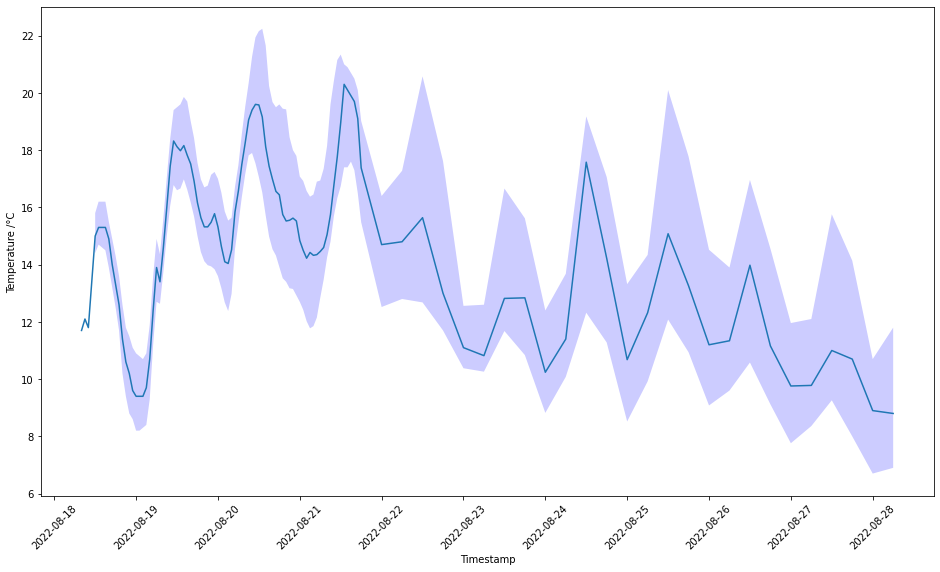

In [47]:
columns=['air_temperature', 'air_temperature_percentile_10', 'air_temperature_percentile_90', 'precipitation_amount']
grouped = data[columns].groupby('_time').mean()

# mean of different forecasts
fig = plt.figure(figsize=(16,9))
plt.plot(grouped.index, grouped['air_temperature'])
plt.fill_between(grouped.index, grouped['air_temperature'], grouped['air_temperature_percentile_10'], facecolor='blue', alpha=0.2)
plt.fill_between(grouped.index, grouped['air_temperature'], grouped['air_temperature_percentile_90'], facecolor='blue', alpha=0.2)

plt.ylabel('Temperature /°C')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.show()

In [48]:
grouped.keys()

Index(['air_temperature', 'air_temperature_percentile_10',
       'air_temperature_percentile_90', 'precipitation_amount'],
      dtype='object')

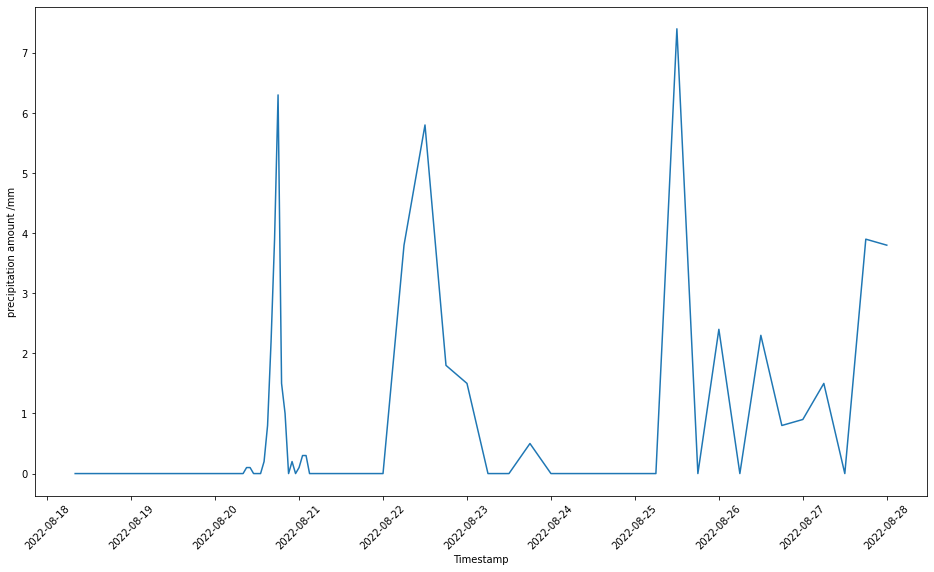

In [49]:
fig = plt.figure(figsize=(16,9))
plt.plot(grouped.index, grouped['precipitation_amount'])
plt.ylabel('precipitation amount /mm')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.show()

In [33]:
SPLIT_RATIO = 0.8

# Dividing into train-test split
split_index = int(SPLIT_RATIO * grouped.shape[0])   

# Train-Test Split
train_data = grouped['air_temperature'][:split_index]
train_time = grouped.index.values[:split_index]  
test_data = grouped['air_temperature'][split_index:]
test_time = grouped.index.values[split_index:]

In [7]:
WINDOW_SIZE = 60
BATCH_SIZE = 32
SHUFFLE_BUFFER = 1000

## function to create the input features
def ts_data_generator(data, window_size, batch_size, shuffle_buffer):
    '''
    Utility function for time series data generation in batches
    '''
    ts_data = tf.data.Dataset.from_tensor_slices(data)
    ts_data = ts_data.window(window_size + 1, shift=1, drop_remainder=True)
    ts_data = ts_data.flat_map(lambda window: window.batch(window_size + 1))
    ts_data = ts_data.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    ts_data = ts_data.batch(batch_size).prefetch(1)
    return ts_data# Expanding data into tensors

tensor_train_data = tf.expand_dims(train_data, axis=-1)
tensor_test_data = tf.expand_dims(test_data, axis=-1)

## generate input and output features for training and testing set
tensor_train_dataset = ts_data_generator(tensor_train_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)
tensor_test_dataset = ts_data_generator(tensor_test_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)

2022-08-19 11:38:28.298842: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-19 11:38:28.299530: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-19 11:38:28.299735: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-NU1UK5H): /proc/driver/nvidia/version does not exist
2022-08-19 11:38:28.306794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
tensor_test_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=32, kernel_size=5,strides=1, padding="causal",activation="relu",                  	 
                            input_shape=[None, 1]),
                            tf.keras.layers.LSTM(64, return_sequences=True),  
                            tf.keras.layers.Dense(10, activation="relu"),  
                            tf.keras.layers.Dense(1)])

In [10]:
optimizer = tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer)
## training neural network model
history = model.fit(tensor_train_dataset, epochs=200, validation_data=tensor_test_dataset)

Epoch 1/200


/home/fneubuerger/.local/anaconda3/envs/dscourse/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 3s 3s/step - loss: 13.8556
Epoch 2/200
1/1 [==============================] - 0s 77ms/step - loss: 13.8266
Epoch 3/200
1/1 [==============================] - 0s 64ms/step - loss: 13.7733
Epoch 4/200
1/1 [==============================] - 0s 59ms/step - loss: 13.6998
Epoch 5/200
1/1 [==============================] - 0s 56ms/step - loss: 13.6090
Epoch 6/200
1/1 [==============================] - 0s 54ms/step - loss: 13.5025
Epoch 7/200
1/1 [==============================] - 0s 52ms/step - loss: 13.3815
Epoch 8/200
1/1 [==============================] - 0s 54ms/step - loss: 13.2462
Epoch 9/200
1/1 [==============================] - 0s 60ms/step - loss: 13.0940
Epoch 10/200
1/1 [==============================] - 0s 59ms/step - loss: 12.9237
Epoch 11/200
1/1 [==============================] - 0s 53ms/step - loss: 12.7462
Epoch 12/200
1/1 [==============================] - 0s 58ms/step - loss: 12.5722
Epoch 13/200
1/1 [==============================] -

1/1 [==============================] - 0s 62ms/step - loss: 0.8598
Epoch 104/200
1/1 [==============================] - 0s 77ms/step - loss: 0.8592
Epoch 105/200
1/1 [==============================] - 0s 53ms/step - loss: 0.8579
Epoch 106/200
1/1 [==============================] - 0s 47ms/step - loss: 0.8560
Epoch 107/200
1/1 [==============================] - 0s 53ms/step - loss: 0.8538
Epoch 108/200
1/1 [==============================] - 0s 42ms/step - loss: 0.8517
Epoch 109/200
1/1 [==============================] - 0s 44ms/step - loss: 0.8501
Epoch 110/200
1/1 [==============================] - 0s 46ms/step - loss: 0.8489
Epoch 111/200
1/1 [==============================] - 0s 43ms/step - loss: 0.8481
Epoch 112/200
1/1 [==============================] - 0s 43ms/step - loss: 0.8473
Epoch 113/200
1/1 [==============================] - 0s 44ms/step - loss: 0.8462
Epoch 114/200
1/1 [==============================] - 0s 45ms/step - loss: 0.8449
Epoch 115/200
1/1 [=======================

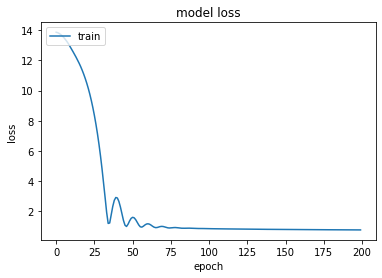

In [11]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
def model_forecast(model, data, window_size):
	ds = tf.data.Dataset.from_tensor_slices(data)
	ds = ds.window(window_size, shift=1, drop_remainder=True)
	ds = ds.flat_map(lambda w: w.batch(window_size))
	ds = ds.batch(32).prefetch(1)
	forecast = model.predict(ds)
	return forecast

rnn_forecast = model_forecast(model, grouped['air_temperature'], WINDOW_SIZE)
rnn_forecast = rnn_forecast[split_index - WINDOW_SIZE:-1, -1, 0]
# Overall Error
error = tf.keras.metrics.mean_absolute_error(test_data, rnn_forecast).numpy()
print(error)

2/2 [==============================] - 0s 22ms/step
3.4298604


In [23]:
test_data

_time
2022-08-23 06:00:00+00:00    10.825
2022-08-23 12:00:00+00:00    12.800
2022-08-23 18:00:00+00:00    12.850
2022-08-24 00:00:00+00:00    10.250
2022-08-24 06:00:00+00:00    11.400
2022-08-24 12:00:00+00:00    17.575
2022-08-24 18:00:00+00:00    14.200
2022-08-25 00:00:00+00:00    10.700
2022-08-25 06:00:00+00:00    12.300
2022-08-25 12:00:00+00:00    15.075
2022-08-25 18:00:00+00:00    13.200
2022-08-26 00:00:00+00:00    11.150
2022-08-26 06:00:00+00:00    11.325
2022-08-26 12:00:00+00:00    13.900
2022-08-26 18:00:00+00:00    11.175
2022-08-27 00:00:00+00:00     9.725
2022-08-27 06:00:00+00:00     9.725
2022-08-27 12:00:00+00:00    11.025
2022-08-27 18:00:00+00:00    10.825
2022-08-28 00:00:00+00:00     8.900
2022-08-28 06:00:00+00:00     8.800
Name: air_temperature, dtype: float64

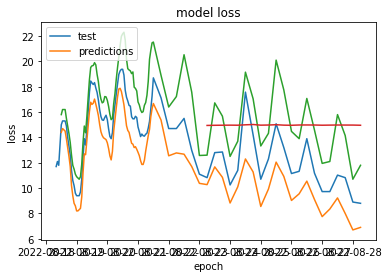

In [27]:
plt.plot(grouped)
plt.plot(test_data.index, rnn_forecast)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'predictions'], loc='upper left')
plt.show()